In [238]:
import csv
import numpy
import numpy as np
import pandas as pd
from numpy import loadtxt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
# from urllib import urlopen
# filename = 'diabetes.csv'
# raw_data = open(filename, 'rb')
# data = loadtxt(raw_data, delimiter=",",skiprows=1)
# print(data.shape)

# Load Data

In [15]:
x=pd.read_csv('diabetes.csv',delimiter=',')
data=x.values

# Data Description

In [29]:
x.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = x.describe()
description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [33]:
class_counts=x.groupby('Outcome').size()
class_counts

Outcome
0    500
1    268
dtype: int64

In [34]:
correlations = x.corr(method='pearson')
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [35]:
skew=x.skew()
skew

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64

# Data Visualization before mining

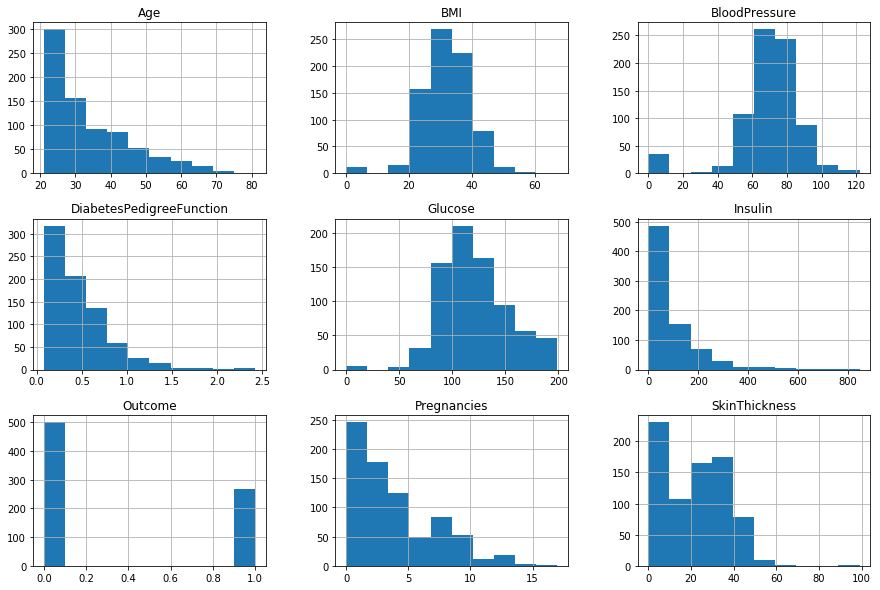

In [39]:
x.hist(figsize=(15,10))
pyplot.show()

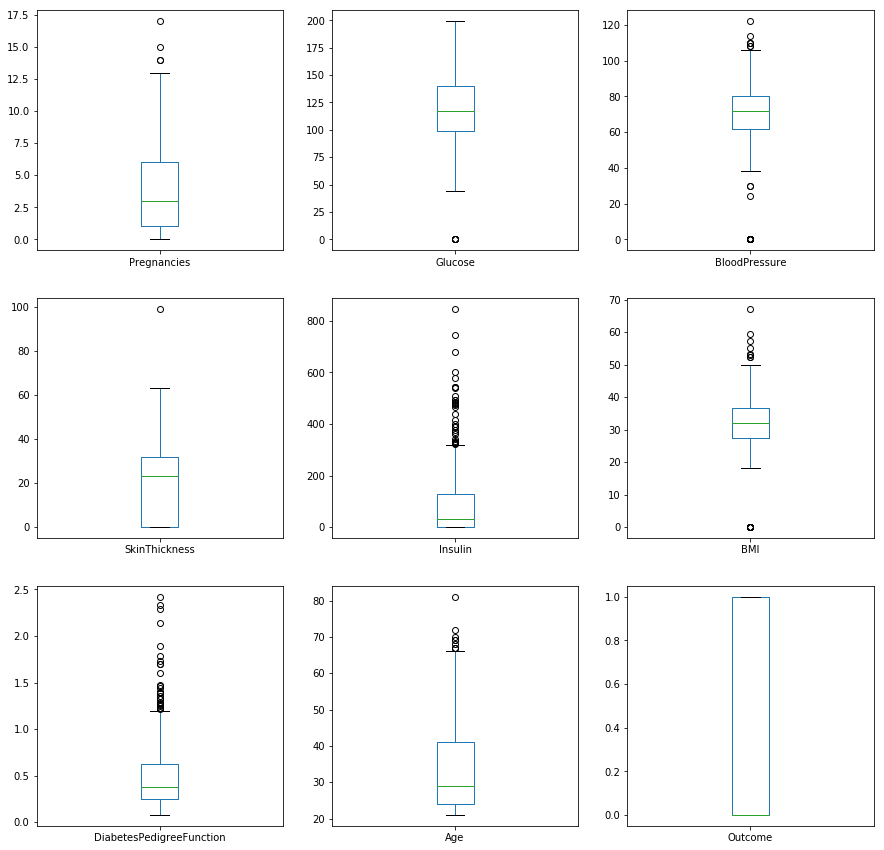

In [49]:
x.plot(kind='box', subplots=True, layout=(3,3), sharex=False,figsize=(15,15))  #'density'
pyplot.show()

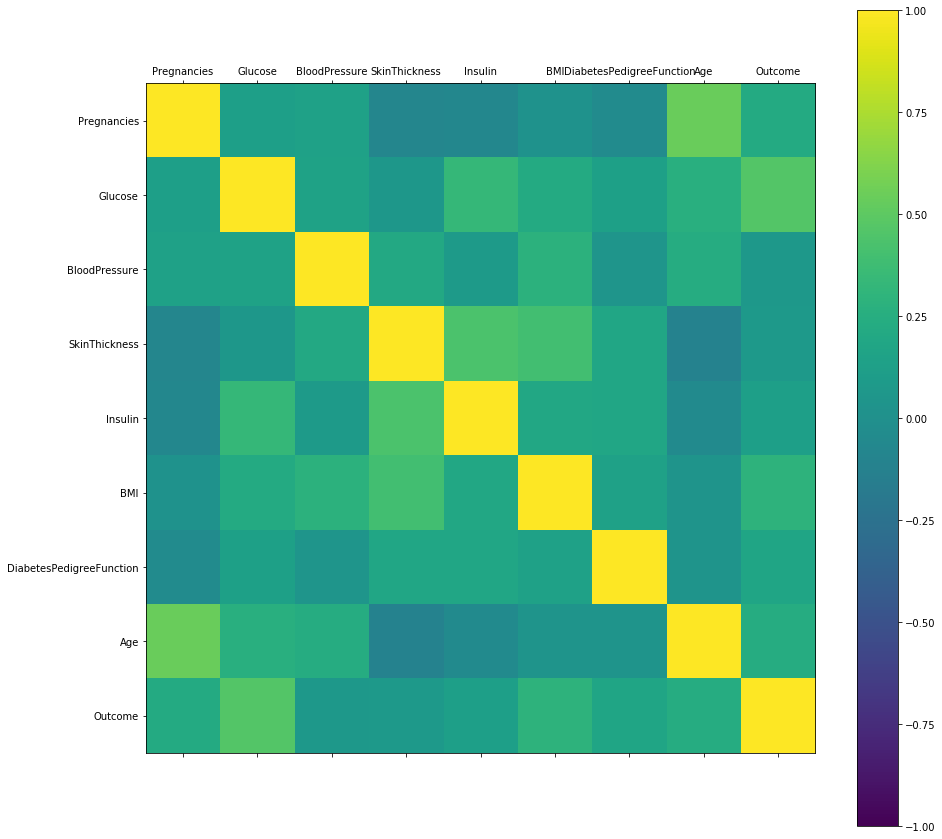

In [55]:
fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(x.columns.values.tolist())
ax.set_yticklabels(x.columns.values.tolist())
pyplot.show()

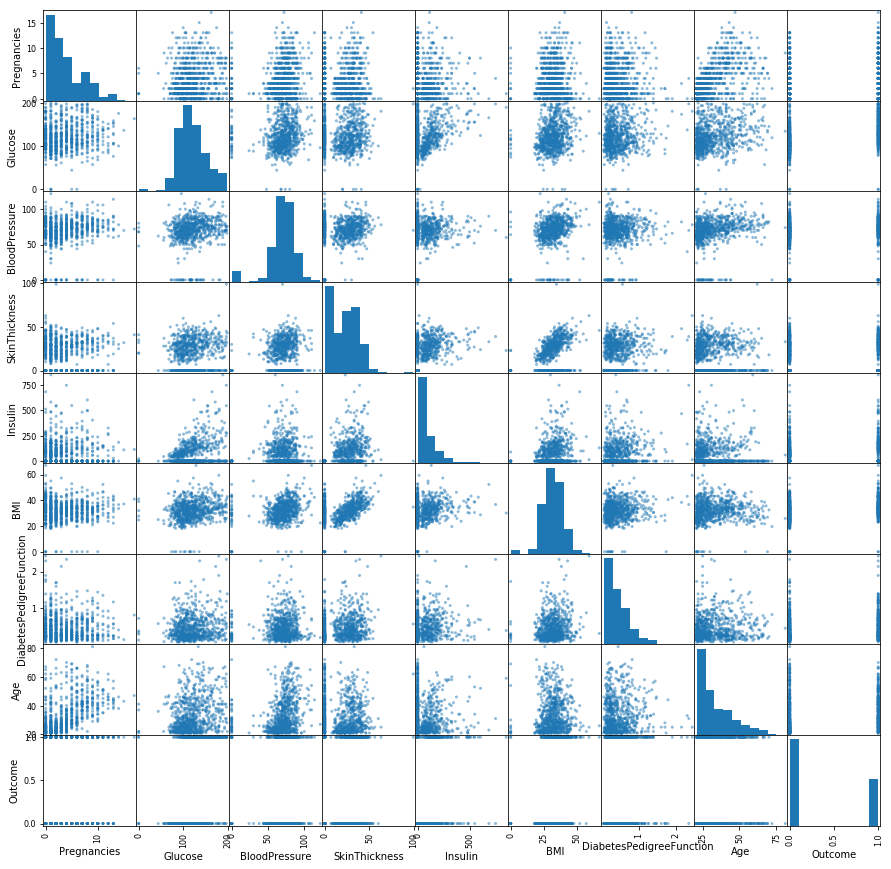

In [58]:
pd.plotting.scatter_matrix(x,figsize=(15,15))
pyplot.show()

# Data preprocessing
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## Rescale Data
1. attributes are often rescaled into (0, 1)  
2. useful for optimization like gradient descent; weights input like regression & NN; use distance like kNN
3. use MinMaxScaler
4. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
5. transformation given by:

*X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))*

*X_scaled = X_std * (max - min) + min*

In [134]:
X = data[:,0:8]
Y = data[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

# Standardize Data
1. transform attributes with a Gaussian distribution (0,1)
2. useful for Gaussian Distribution assumption such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models
3. use  StandardScaler()
4. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [64]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Normalize Data
1. rescaling each observation (row) to have a length of 1
2. use for regression, NN, kNN,text classification or clustering
3. use Normalizer()
4. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In [68]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

## Binarize Data
1. Binarize data (set feature values to 0 or 1) according to a threshold
2. useful for text count data that only counts on presence, boolean random variables (e.g. modelled using the Bernoulli distribution in a Bayesian setting).
2. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

In [73]:
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
binaryX[0:5,:]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

# Feature Selection
1. Reduce Overfitting
2. Improves Accuracy
3. Reduce Training Time
4. http://scikit-learn.org/stable/modules/feature_selection.html

## Univariate Selection
1. select those features that have the strongest relationship with the output variable
2. SelectKBest()  http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
features = fit.transform(X)
features.shape

(768, 4)

## Recursive Feature Elimination

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
fit.support_

array([ True,  True, False, False, False,  True,  True, False])

In [96]:
x.columns.values.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## PCA 
1. gradient reduction
2. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3,svd_solver='full')
fit = pca.fit(X)
XX = pca.transform(X)
print(fit.explained_variance_ratio_)

[0.91046374 0.06311    0.02642626]


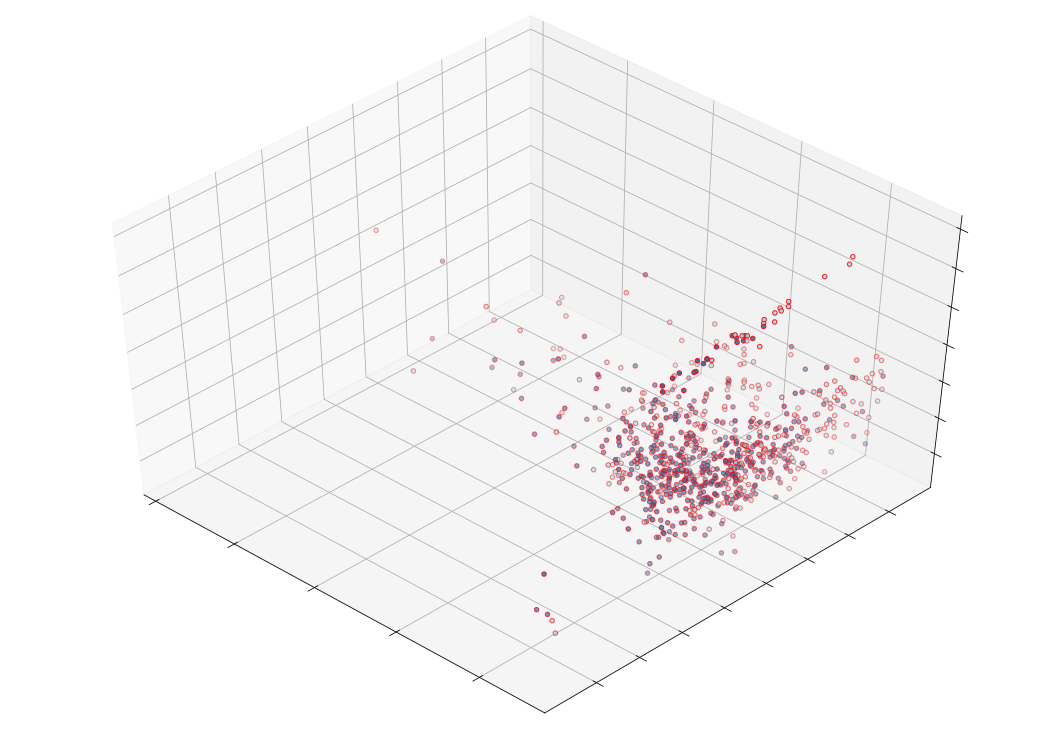

In [130]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

ax.scatter(XX[:, 0], XX[:, 1], XX[:, 2], c=Y, cmap=plt.cm.tab20,edgecolor='r')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Feature Importance
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [135]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.11176071 0.18349227 0.10690319 0.08657363 0.08932987 0.15677552
 0.11832782 0.14683698]


# Performance Evaluation -resampling
## train-test split (large datasets)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
result

0.7559055118110236

## K-fold Cross Validation (generally golden rule)

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.7695146958304853

## Leave One Out Cross Validation

In [147]:
from sklearn.model_selection import LeaveOneOut
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
results.mean()

0.76953125

## Repeated Random Test-Train Splits

In [150]:
from sklearn.model_selection import ShuffleSplit
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.7649606299212598

# Performance Metrics
## Classification Accuracy

In [159]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.048)


## Logarithmic Loss
measure of confidence for a prediction by an algorithm

In [160]:
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.047)


## Area Under ROC Curve
- Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.

- Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

In [161]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.4f (%.4f)" % (results.mean(), results.std()))

AUC: 0.8235 (0.0407)


## Confusion Matrix

In [162]:
from sklearn.metrics import confusion_matrix
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


## Classification Report

In [166]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



# Classification Algorithms
## LDA
for binary and multiclass
classification. It too assumes a Gaussian distribution for the numerical input variables.

In [173]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


## kNN
uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction

In [176]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


## Naive Bayes
conditional probability of each class given each input value

In [177]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


## Classification and Regression Trees
Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index)

In [179]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7004784688995216


## Support Vector Machines
seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed.

In [180]:
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6510252904989747


# Regression Algorithms

In [183]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

## Linear Regression

In [185]:
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.7052559445249


## Ridge Regression
loss function: L2 norm

In [187]:
from sklearn.linear_model import Ridge
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.0782462092593


## LASSO Regression
loss function: L1 norm

In [188]:
from sklearn.linear_model import Lasso
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.46408458830232


## Elastic Regression
Ridge+LASSO

In [190]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.164573714249762


## K-Nearest Neighbors

In [193]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


## CART
select the best points to split the data in order to minimize a cost metric (MSE by default)

In [194]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-33.45873058823529


## SVM in regression

In [195]:
from sklearn.svm import SVR
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-91.04782433324428


# compare ML Algorithms
# classification

LR: 0.779956 (0.050088)
LDA: 0.773462 (0.051592)
KNN: 0.742139 (0.071500)
CART: 0.693882 (0.070863)
NB: 0.755178 (0.042766)
SVM: 0.764286 (0.056962)


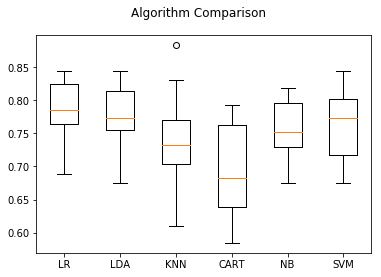

In [205]:
x=pd.read_csv('diabetes.csv',delimiter=',')
data=x.values
X = data[:,0:8]
Y = data[:,8]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LNR: -34.705256 (45.573999)
Ridge: -34.078246 (45.900034)
LASSO: -34.464085 (27.888592)
Elastic: -31.164574 (22.708675)
KNN: -107.286839 (79.839529)
CART: -35.324992 (26.625981)
SVM: -91.047824 (71.101574)


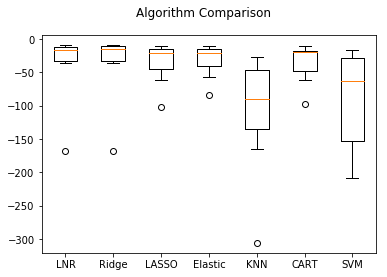

In [209]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# prepare models
models = []
models.append(('LNR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('Elastic', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=8)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Pipeline
## Data Preparation and Modeling Pipeline

In [204]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
filename = 'diabetes.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


## Feature Extraction and Modeling Pipeline

In [214]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'diabetes.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('RFE', RFE(LogisticRegression(), 6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7799555707450445


# Ensembles
## Bagging
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

In [215]:
from sklearn.ensemble import BaggingClassifier
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


### VS. NON-BAGGING

In [218]:
model1 = DecisionTreeRegressor()
results = cross_val_score(model1, X, Y, cv=kfold,scoring='accuracy')
print(results.mean())

0.687388926862611


## Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7616028708133971


In [254]:
model.fit(X, Y)
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = dataframe.columns.values.tolist()[:-1],
                class_names = dataframe.columns.values.tolist()[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# http://webgraphviz.com/

## Extra Trees

In [255]:
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.757758031442242


# Boosting Algorithms
## AdaBoost

In [257]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


## Stochastic Gradient Boosting

In [259]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7733253588516746


## XGBoost

In [269]:
from xgboost.sklearn import XGBClassifier 
import warnings
warnings.filterwarnings('ignore')
model=XGBClassifier(max_depth=3, 
                       eta= 0.2, 
                       n_estimators=100, 
                       silent=True, 
                       objective='binary:logistic', 
                       gamma=8, 
                       min_child_weight=10, 
                       subsample=0.8, 
                       colsample_bytree=0.8,
                       missing=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7682159945317839


# Voting Ensemble
A Voting Classier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data.

In [271]:
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.725187969924812


# Improve Performance with Algorithm Tuning
## Grid Search Parameter Tuning.
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = ElasticNet()
# scoring = {'AUC': 'roc_auc', 'prec': 'precision'}
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='roc_auc',return_train_score=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
grid.grid_scores_

0.8351214647570577
1.0


[mean: 0.83512, std: 0.03816, params: {'alpha': 1.0},
 mean: 0.83505, std: 0.03825, params: {'alpha': 0.1},
 mean: 0.83510, std: 0.03828, params: {'alpha': 0.01},
 mean: 0.83510, std: 0.03828, params: {'alpha': 0.001},
 mean: 0.83510, std: 0.03828, params: {'alpha': 0.0001},
 mean: 0.83510, std: 0.03828, params: {'alpha': 0.0}]

In [296]:
def print_best_score(gsearch,param_test):
     # 输出best score
    print("Best score: %0.4f" % gsearch.best_score_)
    print("Best parameters set:")
    # 输出最佳的分类器到底使用了怎样的参数
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [319]:
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
l1_ratios=numpy.array([1,0.5,0.1,0.01])
param_test = dict(alpha=alphas,l1_ratio=l1_ratios)
model = ElasticNet(max_iter=1000,tol=0.0001)
# scoring = {'AUC': 'roc_auc', 'prec': 'precision'}
scoring=['neg_mean_absolute_error','roc_auc']
grid = GridSearchCV(estimator=model, param_grid=param_test,scoring=scoring,refit='roc_auc',return_train_score=True)
grid.fit(X, Y)
print_best_score(grid,param_test)

Best score: 0.8354
Best parameters set:
	alpha: 0.01
	l1_ratio: 0.01


Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

# Random Search Parameter Tuning

In [321]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.27961712703051084
0.9779895119966027


In [323]:
param_test = {'alpha': uniform(),'l1_ratio':uniform()}
model = ElasticNet(max_iter=1000,tol=0.0001)
# scoring = {'AUC': 'roc_auc', 'prec': 'precision'}
scoring=['neg_mean_absolute_error','roc_auc']
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_test,scoring=scoring,refit='roc_auc',return_train_score=True)
rsearch.fit(X, Y)
print_best_score(grid,param_test)

Best score: 0.8354
Best parameters set:
	alpha: 0.01
	l1_ratio: 0.01


# Save and Load Machine Learning Models
### with pickle

In [324]:
from pickle import dump
from pickle import load
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


### with joblib

In [325]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
filename = 'finalized_model.sav'
dump(model, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


* Python Version.
* Library Versions.
* Manual Serialization.